# 1.Autoencoder

In [110]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
tfkl = tfk.layers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Embedding
from keras.models import Model
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

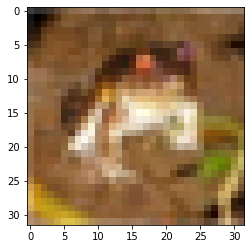

In [3]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()
train_X = (train_X).astype("float32")/255
test_X = (test_X).astype("float32")/255
plt.imshow(train_X[0])

In [4]:
input_img = Input(shape=(32, 32, 3))

In [5]:

model = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
model = MaxPooling2D(pool_size = (2, 2), padding='same')(model)
model = Conv2D(filters = 8, kernel_size =(3, 3), activation='relu', padding='same')(model)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(model)


In [6]:
model = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
model = UpSampling2D((2, 2))(model)
model = Conv2D(16, (3,3), activation='relu', padding='same')(model)
model = UpSampling2D((2, 2))(model)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(model)

In [7]:

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 8)         0   

In [8]:
results1 = autoencoder.fit(train_X,train_X,epochs=20, batch_size=1024, shuffle=True,validation_data=(test_X, test_X))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 101us/step - loss: 0.6527 - val_loss: 0.6196
Epoch 2/20
50000/50000 [==============================] - 3s 54us/step - loss: 0.6219 - val_loss: 0.6132
Epoch 3/20
50000/50000 [==============================] - 3s 54us/step - loss: 0.6114 - val_loss: 0.6117
Epoch 4/20
50000/50000 [==============================] - 3s 53us/step - loss: 0.6042 - val_loss: 0.6008
Epoch 5/20
50000/50000 [==============================] - 3s 54us/step - loss: 0.5990 - val_loss: 0.5986
Epoch 6/20
50000/50000 [==============================] - 3s 55us/step - loss: 0.5955 - val_loss: 0.5959
Epoch 7/20
50000/50000 [==============================] - 3s 54us/step - loss: 0.5928 - val_loss: 0.5912
Epoch 8/20
50000/50000 [==============================] - 3s 54us/step - loss: 0.5907 - val_loss: 0.5906
Epoch 9/20
50000/50000 [==============================] - 3s 54us/step - loss: 0.5888 - val_loss: 0.5900
Epoc

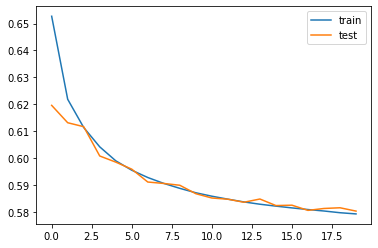

In [51]:
plt.plot(results1.history['loss'])
plt.plot(results1.history['val_loss'])
plt.legend(labels=['train','test'])

In [12]:
new_img = autoencoder.predict(test_X)


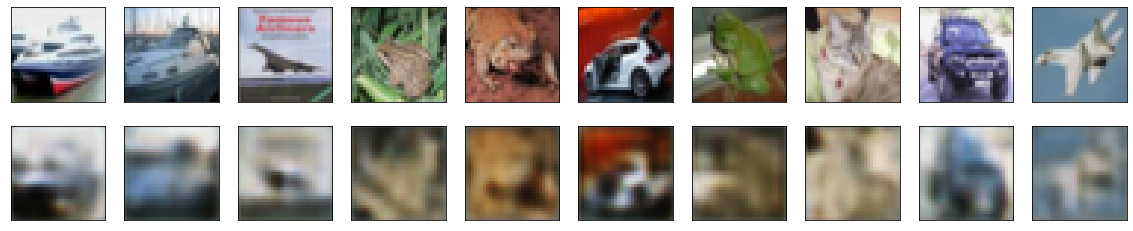

In [13]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(test_X[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(new_img[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2. Image Classification

### 2.1 Deep CNN

In [17]:
tf.one_hot(train_y,depth=10)

<tf.Tensor: shape=(50000, 1, 10), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 1., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.]]], dtype=float32)>

In [40]:
model_cnn = tfk.Sequential()
model_cnn.add(tfkl.Conv2D(128,kernel_size=(2,2),strides=1,input_shape=(32,32,3),padding='same',activation='relu'))
model_cnn.add(tfkl.MaxPool2D(pool_size=(2,2)))
model_cnn.add(tfkl.Dropout(0.2))
model_cnn.add(tfkl.Conv2D(64,kernel_size=(2,2),strides=1,padding='same',activation='relu'))
model_cnn.add(tfkl.MaxPool2D(pool_size=(2,2)))
model_cnn.add(tfkl.Dropout(0.2))
model_cnn.add(tfkl.Conv2D(64,kernel_size=(2,2),strides=1,padding='same',activation='relu'))
model_cnn.add(tfkl.MaxPool2D(pool_size=(2,2)))
model_cnn.add(tfkl.Dropout(0.2))

model_cnn.add(tfkl.Flatten())
model_cnn.add(tfkl.Dense(32,activation='relu'))
model_cnn.add(tfkl.Dropout(0.2))
model_cnn.add(tfkl.Dense(10,activation='softmax'))
model_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 128)       1664      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)         

kernel size = (2,2) 

strides = 1

padding is same 

activation function = relu

depth is 9.


In [41]:
model_cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [42]:
train_label = to_categorical(train_y)
test_label = to_categorical(test_y)


In [43]:
results2 = model_cnn.fit(train_X,train_label,epochs=30,batch_size=128,validation_data=(test_X,test_label))


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 89us/sample - loss: 1.9358 - accuracy: 0.2886 - val_loss: 1.6788 - val_accuracy: 0.4015
Epoch 2/30
50000/50000 [==============================] - 4s 82us/sample - loss: 1.6192 - accuracy: 0.4096 - val_loss: 1.4171 - val_accuracy: 0.4919
Epoch 3/30
50000/50000 [==============================] - 4s 82us/sample - loss: 1.4734 - accuracy: 0.4667 - val_loss: 1.3005 - val_accuracy: 0.5470
Epoch 4/30
50000/50000 [==============================] - 4s 80us/sample - loss: 1.3790 - accuracy: 0.5040 - val_loss: 1.2276 - val_accuracy: 0.5688
Epoch 5/30
50000/50000 [==============================] - 4s 81us/sample - loss: 1.3161 - accuracy: 0.5257 - val_loss: 1.2067 - val_accuracy: 0.5697
Epoch 6/30
50000/50000 [==============================] - 4s 80us/sample - loss: 1.2655 - accuracy: 0.5467 - val_loss: 1.1115 - val_accuracy: 0.6162
Epoch 7/30
50000/50000 [==============================] 

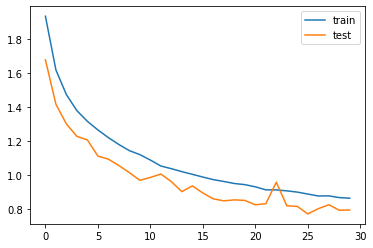

In [44]:
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.legend(labels=['train','test'])

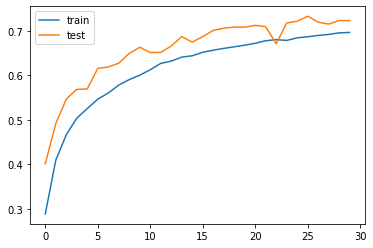

In [45]:
plt.plot(results2.history['accuracy'])
plt.plot(results2.history['val_accuracy'])
plt.legend(labels=['train','test'])

## 2.2 Transfer learning

In [46]:
from tensorflow.keras.applications import VGG16


In [47]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [48]:
model_vgg = tfk.Sequential()
model_vgg.add(conv_base)
model_vgg.add(tfkl.Flatten())
model_vgg.add(tfkl.Dense(32, activation='relu'))
model_vgg.add(tfkl.Dropout(0.2))
model_vgg.add(tfkl.Dense(10, activation='softmax'))
model_vgg.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                16416     
_________________________________________________________________
dropout_31 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 14,731,434
Trainable params: 14,731,434
Non-trainable params: 0
_________________________________________________________________


In [54]:
conv_base.trainable = False
len(model_vgg.trainable_weights)

4

In [56]:
model_vgg.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
results3 = model_vgg.fit(train_X, train_label, epochs=10, batch_size=128,validation_data=(test_X,test_label))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 216us/sample - loss: 1.7138 - accuracy: 0.3918 - val_loss: 1.4227 - val_accuracy: 0.5161
Epoch 2/10
50000/50000 [==============================] - 6s 118us/sample - loss: 1.4417 - accuracy: 0.4945 - val_loss: 1.3284 - val_accuracy: 0.5377
Epoch 3/10
50000/50000 [==============================] - 6s 117us/sample - loss: 1.3542 - accuracy: 0.5265 - val_loss: 1.2847 - val_accuracy: 0.5482
Epoch 4/10
50000/50000 [==============================] - 6s 117us/sample - loss: 1.3160 - accuracy: 0.5413 - val_loss: 1.2443 - val_accuracy: 0.5642
Epoch 5/10
50000/50000 [==============================] - 6s 117us/sample - loss: 1.2847 - accuracy: 0.5526 - val_loss: 1.2273 - val_accuracy: 0.5717
Epoch 6/10
50000/50000 [==============================] - 6s 120us/sample - loss: 1.2597 - accuracy: 0.5611 - val_loss: 1.2201 - val_accuracy: 0.5732
Epoch 7/10
50000/50000 [=========================

In [58]:
model_vgg.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

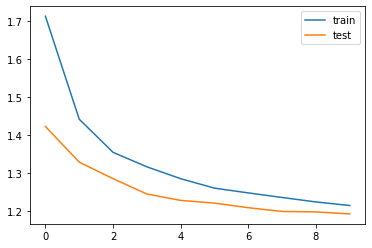

In [61]:
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.legend(labels=['train','test'])

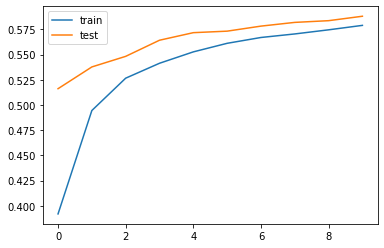

In [62]:

plt.plot(results3.history['accuracy'])
plt.plot(results3.history['val_accuracy'])
plt.legend(labels=['train','test'])

# 3. Text Classification

### 3.1 RNN

In [67]:
spam = pd.read_csv('SPAM_detection.csv')
spam

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [70]:
message = spam['Message']
category= spam['category_val']

In [71]:

message = np.asarray(message )
category = np.asarray(category)

In [72]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(message)

In [74]:
vocab_size = len(tokenizer.word_index)+1
sequences = tokenizer.texts_to_sequences(message)
data = pad_sequences(sequences,padding='post')
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [75]:
data = data[indices]
labels = category[indices]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [79]:
X_train.shape

(3900, 189)

In [98]:
model_rnn = tfk.Sequential()
model_rnn.add(tfkl.Embedding(vocab_size, 32, input_length=189))
model_rnn.add(tfkl.LSTM(128,return_sequences=True))
model_rnn.add(tfkl.GlobalMaxPool1D())
model_rnn.add(tfkl.Dropout(0.2))
model_rnn.add(tfkl.Dense(128,activation="relu"))
model_rnn.add(tfkl.Dropout(0.2))
model_rnn.add(tfkl.Dense(64,activation="relu"))
model_rnn.add(tfkl.Dropout(0.2))
model_rnn.add(tfkl.Dense(1,activation="sigmoid"))
model_rnn.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 189, 32)           288160    
_________________________________________________________________
lstm_6 (LSTM)                (None, 189, 128)          82432     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 128)               0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_49 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)              

In [99]:
results4 = model_rnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=1024)


Train on 3900 samples, validate on 1672 samples
Epoch 1/20
3900/3900 [==============================] - 2s 399us/sample - loss: 1.3864 - accuracy: 0.6977 - val_loss: 0.4249 - val_accuracy: 0.8624
Epoch 2/20
3900/3900 [==============================] - 0s 62us/sample - loss: 0.4374 - accuracy: 0.8674 - val_loss: 0.2921 - val_accuracy: 0.8624
Epoch 3/20
3900/3900 [==============================] - 0s 61us/sample - loss: 0.2187 - accuracy: 0.8931 - val_loss: 0.2858 - val_accuracy: 0.9234
Epoch 4/20
3900/3900 [==============================] - 0s 61us/sample - loss: 0.1394 - accuracy: 0.9544 - val_loss: 0.1287 - val_accuracy: 0.9522
Epoch 5/20
3900/3900 [==============================] - 0s 60us/sample - loss: 0.0967 - accuracy: 0.9656 - val_loss: 0.1939 - val_accuracy: 0.9163
Epoch 6/20
3900/3900 [==============================] - 0s 60us/sample - loss: 0.0724 - accuracy: 0.9721 - val_loss: 0.1390 - val_accuracy: 0.9623
Epoch 7/20
3900/3900 [==============================] - 0s 60us/sampl

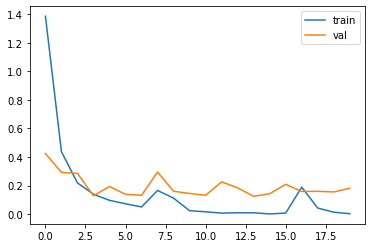

In [100]:
plt.plot(results4.history["loss"])
plt.plot(results4.history["val_loss"])
plt.legend(labels=["train", "val"])

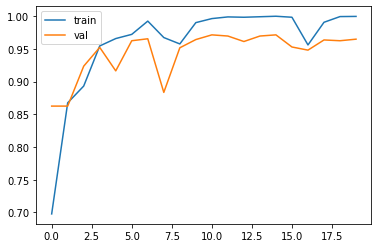

In [101]:
plt.plot(results4.history["accuracy"])
plt.plot(results4.history["val_accuracy"])
plt.legend(labels=["train", "val"])

## 3.2  CNN

In [121]:


model_cnn_text = tfk.Sequential()
model_cnn_text.add(tfkl.Embedding(vocab_size, 32, input_length=189))
model_cnn_text.add(tfkl.Conv1D(128, 5, activation='relu'))
model_cnn_text.add(tfkl.GlobalMaxPooling1D())
model_cnn_text.add(tfkl.Dense(10, activation='relu'))
model_cnn_text.add(tfkl.Dense(1, activation='sigmoid'))
model_cnn_text.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_cnn_text.summary()


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 189, 32)           288160    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 185, 128)          20608     
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 310,069
Trainable params: 310,069
Non-trainable params: 0
_________________________________________________________________


In [122]:
results5 = model_cnn_text.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=1024)


Train on 3900 samples, validate on 1672 samples
Epoch 1/30
3900/3900 [==============================] - 1s 210us/sample - loss: 0.6757 - accuracy: 0.7815 - val_loss: 0.6469 - val_accuracy: 0.8624
Epoch 2/30
3900/3900 [==============================] - 1s 136us/sample - loss: 0.6295 - accuracy: 0.8674 - val_loss: 0.6017 - val_accuracy: 0.8624
Epoch 3/30
3900/3900 [==============================] - 1s 132us/sample - loss: 0.5794 - accuracy: 0.8674 - val_loss: 0.5471 - val_accuracy: 0.8624
Epoch 4/30
3900/3900 [==============================] - 0s 122us/sample - loss: 0.5198 - accuracy: 0.8674 - val_loss: 0.4873 - val_accuracy: 0.8624
Epoch 5/30
3900/3900 [==============================] - 0s 121us/sample - loss: 0.4601 - accuracy: 0.8674 - val_loss: 0.4325 - val_accuracy: 0.8624
Epoch 6/30
3900/3900 [==============================] - 0s 122us/sample - loss: 0.4078 - accuracy: 0.8674 - val_loss: 0.3947 - val_accuracy: 0.8624
Epoch 7/30
3900/3900 [==============================] - 0s 121us

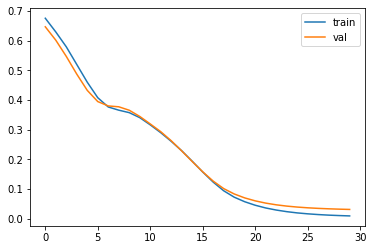

In [123]:
plt.plot(results5.history["loss"])
plt.plot(results5.history["val_loss"])
plt.legend(labels=["train", "val"])

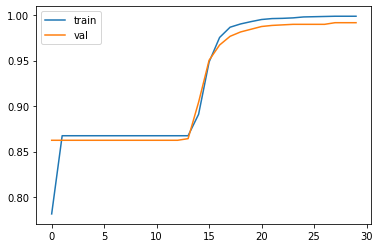

In [124]:
plt.plot(results5.history["accuracy"])
plt.plot(results5.history["val_accuracy"])
plt.legend(labels=["train", "val"])

## 3.3 roc 

In [130]:
from sklearn.metrics import roc_curve, auc

In [203]:
rnn_pred = model_rnn.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

In [197]:
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, rnn_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])


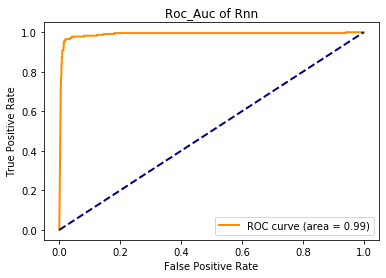

In [198]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc_Auc of Rnn')
plt.legend(loc="lower right")
plt.show()

In [199]:
cnn_pred = model_rnn.predict(X_test)

In [200]:
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, cnn_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])


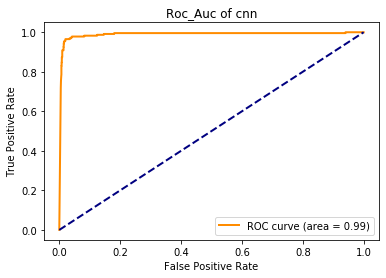

In [202]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc_Auc of cnn')
plt.legend(loc="lower right")
plt.show()